In [1]:
import pandas as pd
import numpy as np

In [2]:
pip install pandas xlrd


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
d=pd.read_excel("titanic3.xls")
d.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [4]:
d.isnull().sum() 

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [5]:
d.duplicated().sum()

0

Data Preprocessing
1) first we'll replace the null values

In [6]:
d['age'].fillna(d['age'].mean(), inplace=True)
d['fare'].fillna(d['fare'].median(), inplace=True)

#Create a new feature indicating whether cabin information is available, and fill missing values.
d['cabin_known'] = d['cabin'].notnull().astype(int)
d['cabin'].fillna('Unknown', inplace=True)

d['embarked'].fillna(d['embarked'].mode()[0], inplace=True)
#Create a new feature indicating whether boat information is available, and fill missing values.
d['boat_known'] = d['boat'].notnull().astype(int)
d['boat'].fillna('Unknown', inplace=True)

d.drop(columns=['body', 'home.dest'], inplace=True)




In [7]:
d.isnull().sum()

pclass         0
survived       0
name           0
sex            0
age            0
sibsp          0
parch          0
ticket         0
fare           0
cabin          0
embarked       0
boat           0
cabin_known    0
boat_known     0
dtype: int64

In [8]:
d.keys()

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'cabin_known', 'boat_known'],
      dtype='object')

Data visualisation

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

<AxesSubplot:>

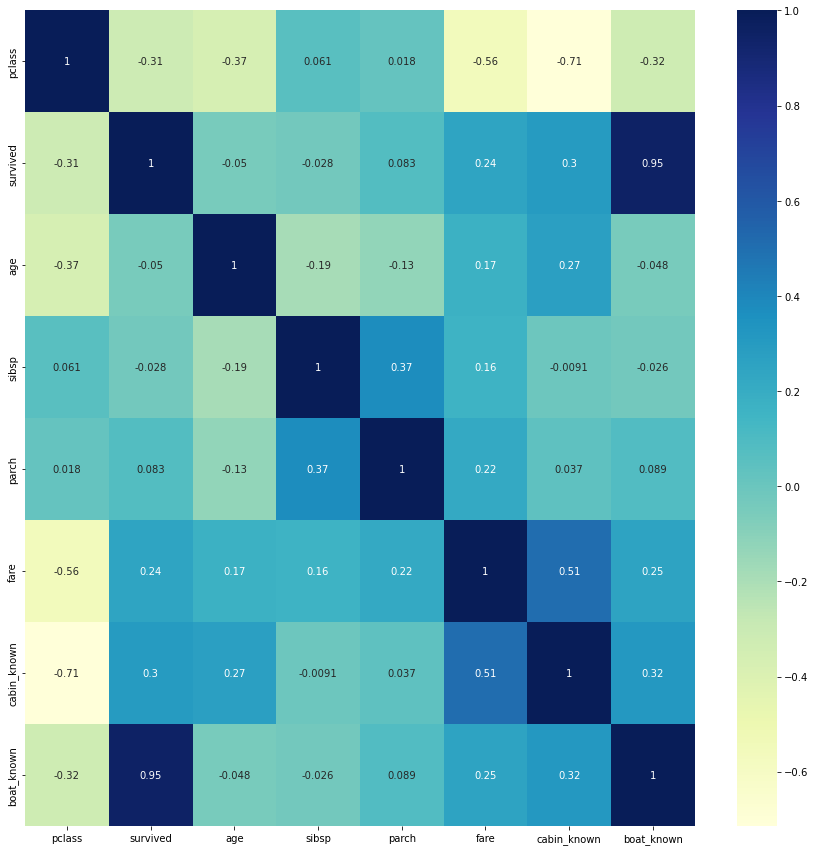

In [10]:
corr_matrix = d.corr()
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu")

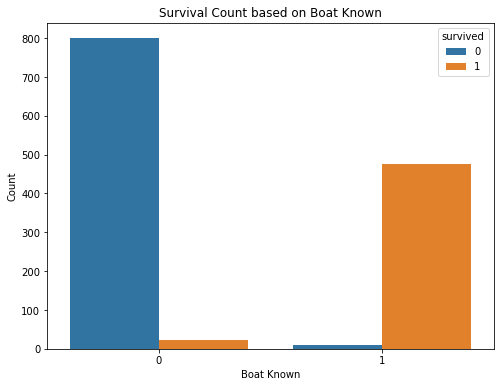

In [11]:
# Example count plot for boat_known vs. survival
plt.figure(figsize=(8, 6))
sns.countplot(x='boat_known', hue='survived', data=d)
plt.title('Survival Count based on Boat Known')
plt.xlabel('Boat Known')
plt.ylabel('Count')
plt.show()

It appears that more people who boarded lifeboats survived than died. There are more survivors (bright green) than there are non-survivors (dark green) across all the counts with known boat information.
There were a significant number of people who boarded lifeboats for whom we don't know if they survived or not (dark gray). This could be because information about their survival was not recorded, or because they boarded a lifeboat that did not survive the sinking.

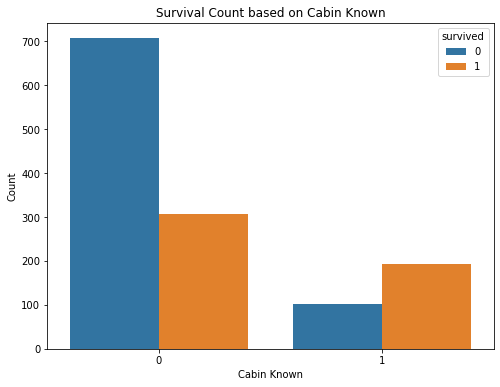

In [12]:
plt.figure(figsize=(8, 6))
sns.countplot(x='cabin_known', hue='survived', data=d)
plt.title('Survival Count based on Cabin Known')
plt.xlabel('Cabin Known')
plt.ylabel('Count')
plt.show()


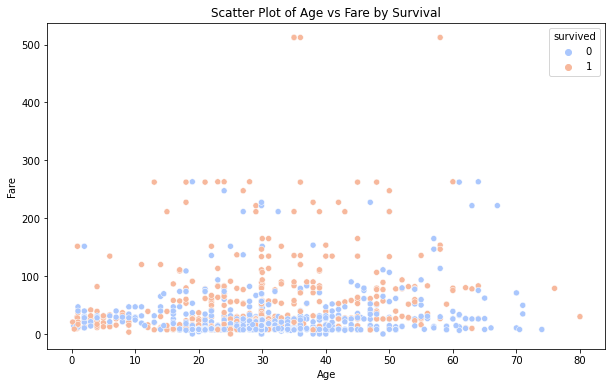

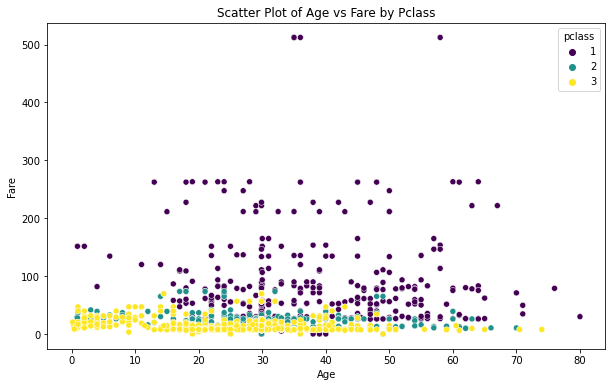

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot for Age vs Fare colored by Survival
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='fare', hue='survived', data=d, palette='coolwarm')
plt.title('Scatter Plot of Age vs Fare by Survival')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

# Scatter plot for Age vs Fare colored by Pclass
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='fare', hue='pclass', data=d, palette='viridis')
plt.title('Scatter Plot of Age vs Fare by Pclass')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()


younger passengers might have had a slightly better chance of survival compared to older passengers.
However, the data points are quite scattered, which means the trend is not very strong. There are many survivors of all ages, and there were also non-survivors of all ages.



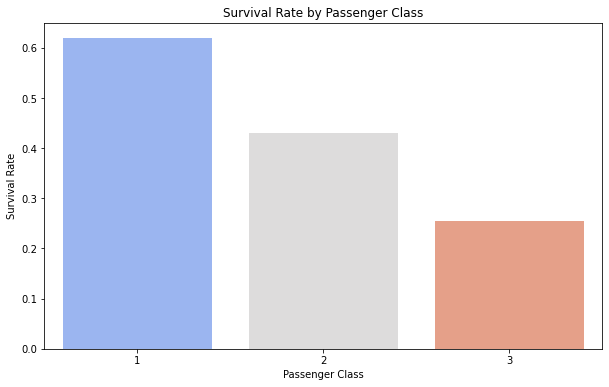

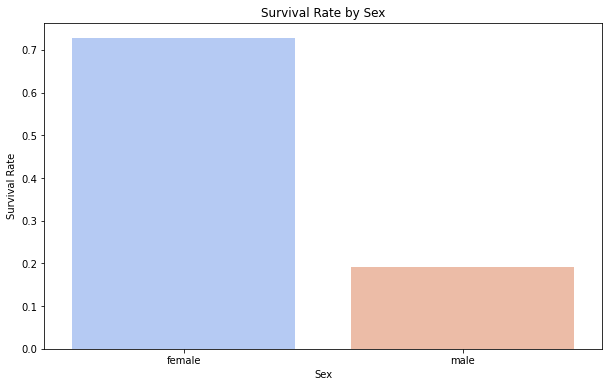

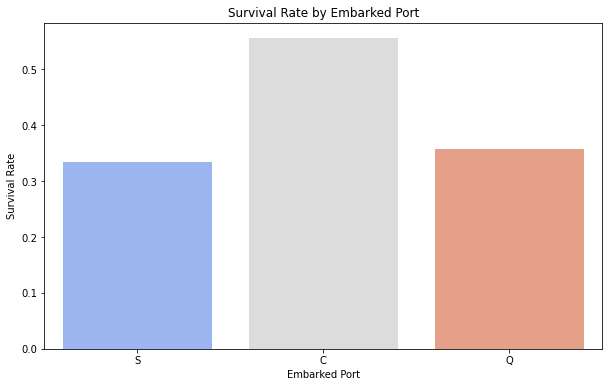

embarked
C    0.555556
Q    0.357724
S    0.334061
Name: survived, dtype: float64


In [14]:
#bar charts for survival rates 
#import seaborn as sns
#import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x='pclass', y='survived', data=d, palette='coolwarm', ci=None)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()


plt.figure(figsize=(10, 6))
sns.barplot(x='sex', y='survived', data=d, palette='coolwarm', ci=None)
plt.title('Survival Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='embarked', y='survived', data=d, palette='coolwarm', ci=None)
plt.title('Survival Rate by Embarked Port')
plt.xlabel('Embarked Port')
plt.ylabel('Survival Rate')
plt.show()

survival_rates_by_embarked = d.groupby('embarked')['survived'].mean()
print(survival_rates_by_embarked)


In [15]:
d["survived"].describe()

count    1309.000000
mean        0.381971
std         0.486055
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: survived, dtype: float64

In [16]:
d.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,cabin_known,boat_known
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,1,1
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,1,1
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,Unknown,1,0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,Unknown,1,0
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,Unknown,1,0


Now encoding categorical data into numerical data

In [17]:
d['sex'] = d['sex'].map({'male': 0, 'female': 1})
#one-hot encoding since there are multiple categories (S, C, Q).
d = pd.get_dummies(d, columns=['embarked'], drop_first=True)
# Convert boat to categorical codes (if boat values are strings)
d['boat'] = pd.Categorical(d['boat'])
d['boat'] = d['boat'].cat.codes

# Convert cabin to numerical mapping (assuming cabin contains string labels)
cabin_mapping = {'A': 1, 'B': 2, 'C': 3, 'Unknown': 0}
d['cabin'] = d['cabin'].map(cabin_mapping).fillna(0).astype(int)

# Ensure cabin_known is numerical (already 1 or 0)
d['cabin_known'] = d['cabin_known'].astype(int)

In [18]:
d.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,boat,cabin_known,boat_known,embarked_Q,embarked_S
0,1,1,"Allen, Miss. Elisabeth Walton",1,29.0000,0,0,24160,211.3375,0,0,1,1,0,1
1,1,1,"Allison, Master. Hudson Trevor",0,0.9167,1,2,113781,151.5500,0,3,1,1,0,1
2,1,0,"Allison, Miss. Helen Loraine",1,2.0000,1,2,113781,151.5500,0,28,1,0,0,1
3,1,0,"Allison, Mr. Hudson Joshua Creighton",0,30.0000,1,2,113781,151.5500,0,28,1,0,0,1
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,25.0000,1,2,113781,151.5500,0,28,1,0,0,1


In [19]:

# Check column names and index
print("Column Names:", d.columns)
print("Index:", d.index)

# Ensure all necessary columns are present and correctly formatted
selected_features = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'boat_known', 'cabin_known', 'survived']
if 'embarked' in d.columns:
    selected_features.append('embarked')  # Add embarked if it exists
d_selected = d[selected_features]

# Check shape after dropping rows with missing values
print("Shape after dropping rows with missing values:", d_selected.shape)

# Check if there are enough rows remaining
if d_selected.shape[0] == 0:
    print("Error: No data points remaining after dropping rows with missing values.")
else:
    # Convert categorical variables to numerical using one-hot encoding if applicable
    d_selected['sex'] = d_selected['sex'].map({'male': 0, 'female': 1})
     # Define X (features) and y (target)
    X = d_selected.drop('survived', axis=1)
    y = d_selected['survived']
    
    # Display the shape of X and y to verify
    print(f'X shape: {X.shape}')
    print(f'y shape: {y.shape}')



Column Names: Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'boat', 'cabin_known', 'boat_known', 'embarked_Q',
       'embarked_S'],
      dtype='object')
Index: RangeIndex(start=0, stop=1309, step=1)
Shape after dropping rows with missing values: (1309, 9)
X shape: (1309, 8)
y shape: (1309,)


C:\Users\nas47\AppData\Local\Temp\ipykernel_21704\2125294993.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_selected['sex'] = d_selected['sex'].map({'male': 0, 'female': 1})


In [20]:
# Check for missing values
print("Number of NaNs in dataset:")
print(d_selected.isnull().sum())

# Check for infinite values
print("Number of infinite values in dataset:")
print(np.isinf(d_selected).sum())


Number of NaNs in dataset:
pclass            0
sex            1309
age               0
sibsp             0
parch             0
fare              0
boat_known        0
cabin_known       0
survived          0
dtype: int64
Number of infinite values in dataset:
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
boat_known     0
cabin_known    0
survived       0
dtype: int64


To handle the NaNs of sex column

In [21]:
import pandas as pd
from sklearn.impute import SimpleImputer



# Print initial number of NaNs
print("Number of NaNs in dataset before handling:")
print(d.isna().sum())

# Create an imputer object with the strategy to fill missing values with the most frequent value
imputer = SimpleImputer(strategy='most_frequent')

# Apply the imputer to the 'sex' column
d['sex'] = imputer.fit_transform(d[['sex']])

# Verify if NaNs are handled
print("Number of NaNs in dataset after handling:")
print(d.isna().sum())



Number of NaNs in dataset before handling:
pclass         0
survived       0
name           0
sex            0
age            0
sibsp          0
parch          0
ticket         0
fare           0
cabin          0
boat           0
cabin_known    0
boat_known     0
embarked_Q     0
embarked_S     0
dtype: int64
Number of NaNs in dataset after handling:
pclass         0
survived       0
name           0
sex            0
age            0
sibsp          0
parch          0
ticket         0
fare           0
cabin          0
boat           0
cabin_known    0
boat_known     0
embarked_Q     0
embarked_S     0
dtype: int64


In [22]:
print(d_selected.columns)


Index(['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'boat_known',
       'cabin_known', 'survived'],
      dtype='object')


In [23]:
# Check if all columns are ready to be fed into the model
columns_to_check = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'boat_known', 'cabin_known', 'survived']
if d[columns_to_check].isna().sum().sum() == 0:
    print("All columns are free from NaN values and ready to be fed into the model.")
else:
    print("There are still NaN values in the dataset. Please handle them before feeding into the model.")

# Ensure all data are in the correct format (e.g., numerical) if required
print(d[columns_to_check].dtypes)

All columns are free from NaN values and ready to be fed into the model.
pclass           int64
sex              int64
age            float64
sibsp            int64
parch            int64
fare           float64
boat_known       int32
cabin_known      int32
survived         int64
dtype: object


In [24]:
# Check the size of the dataset after handling NaNs
dataset_size = d.shape

# Print the size of the dataset
print(f"Dataset size after handling NaNs: {dataset_size}")


Dataset size after handling NaNs: (1309, 15)


Test and Train splitting of data

In [26]:
# Define X (features) and y (target)
X = d_selected.drop('survived', axis=1)
y = d_selected['survived']

# Splitting into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes to ensure they are correct
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')


X_train shape: (1047, 8)
X_test shape: (262, 8)
y_train shape: (1047,)
y_test shape: (262,)


Now Deploying Models suitable for the data classification Problem

In [29]:
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the imputer with strategy to fill NaN values with mean (or median)
imputer = SimpleImputer(strategy='mean')

# Fit on the training data
imputer.fit(X_train)

# Transform both training and testing data
X_train_imputed = imputer.transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Fit the model on the imputed training data
rf_model.fit(X_train_imputed, y_train)

# Predict on the imputed test data
y_pred_rf = rf_model.predict(X_test_imputed)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.9732824427480916

Confusion Matrix:
[[144   0]
 [  7 111]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       144
           1       1.00      0.94      0.97       118

    accuracy                           0.97       262
   macro avg       0.98      0.97      0.97       262
weighted avg       0.97      0.97      0.97       262



 the accuracy is 0.973, which means that the model correctly predicted the survival outcome for approximately 97.3% of the passengers in the test set.
 
1)when the model predicts a passenger survived (1), it is correct 100% of the time, and when it predicts a passenger did not survive (0), it is correct 95% of the time.


pip install tensorflow
